# Welcome to Pipelines!

The HuggingFace transformers library provides APIs at two different levels.

The High Level API for using open-source models for typical inference tasks is called "pipelines". It's incredibly easy to use.

You create a pipeline using something like:

`my_pipeline = pipeline("the_task_I_want_to_do")`

Followed by

`result = my_pipeline(my_input)`

And that's it!

See end of this colab for a list of all pipelines.

## A sidenote:

You may already know this, but just in case you're not familiar with the word "inference" that I use here:

When working with Data Science models, you could be carrying out 2 very different activities: **training** and **inference**.

### 1. Training  

**Training** is when you provide a model with data for it to adapt to get better at a task in the future. It does this by updating its internal settings - the parameters or weights of the model. If you're Training a model that's already had some training, the activity is called "fine-tuning".

### 2. Inference

**Inference** is when you are working with a model that has _already been trained_. You are using that model to produce new outputs on new inputs, taking advantage of everything it learned while it was being trained. Inference is also sometimes referred to as "Execution" or "Running a model".

All of our use of APIs for GPT, Claude and Gemini in the last weeks are examples of **inference**. The "P" in GPT stands for "Pre-trained", meaning that it has already been trained with data (lots of it!) In week 6 we will try fine-tuning GPT ourselves.
  
The pipelines API in HuggingFace is only for use for **inference** - running a model that has already been trained. In week 7 we will be training our own model, and we will need to use the more advanced HuggingFace APIs that we look at in the up-coming lecture.


In [19]:
!pip install -q transformers datasets diffusers ultralytics torchvision pytesseract


In [20]:
# Imports

import torch
from google.colab import userdata
from huggingface_hub import login
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from transformers import BlipProcessor, BlipForConditionalGeneration



# Important Note

I didn't mention this in the lecture, but you may need to log in to the HuggingFace hub if you've not done so before.

1. If you haven't already done so, create a **free** HuggingFace account at https://huggingface.co and navigate to Settings from the user menu on the top right. Then Create a new API token, giving yourself write permissions.

**IMPORTANT** when you create your HuggingFace API key, please be sure to select read and write permissions for your key, otherwise you may get problems later.

2. Back here in colab, press the "key" icon on the side panel to the left, and add a new secret:  
  In the name field put `HF_TOKEN`  
  In the value field put your actual token: `hf_...`  
  Ensure the notebook access switch is turned ON.

3. Execute the cell below to log in. You'll need to do this on each of your colabs. It's a really useful way to manage your secrets without needing to type them into colab. There's also a shortcut to simply overwrite the line below with:  
`hf_token = "hf_...."`  
But this isn't a best practice, as you'd have to be careful not to share the colab. And one of the great things about colabs is that you can share them!

In [37]:
hf_token = userdata.get('HF_TOKEN')
login(hf_token, add_to_git_credential=True)

In [22]:
# Sentiment Analysis

# Check if CUDA (GPU) is available
device = 0 if torch.cuda.is_available() else -1

# Create the sentiment analysis pipeline
classifier = pipeline("sentiment-analysis", device=device)

result = classifier("I'm super excited to be on the way to LLM mastery!")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9993460774421692}]


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'score': 0.8178191184997559, 'label': 'potted plant', 'box': {'xmin': 58, 'ymin': 78, 'xmax': 103, 'ymax': 127}}, {'score': 0.6246597170829773, 'label': 'potted plant', 'box': {'xmin': 682, 'ymin': 110, 'xmax': 723, 'ymax': 155}}, {'score': 0.9994431138038635, 'label': 'dog', 'box': {'xmin': 131, 'ymin': 221, 'xmax': 309, 'ymax': 536}}, {'score': 0.9987602233886719, 'label': 'bicycle', 'box': {'xmin': 124, 'ymin': 128, 'xmax': 565, 'ymax': 421}}, {'score': 0.9768097996711731, 'label': 'truck', 'box': {'xmin': 469, 'ymin': 76, 'xmax': 680, 'ymax': 166}}, {'score': 0.9102177023887634, 'label': 'car', 'box': {'xmin': 471, 'ymin': 77, 'xmax': 679, 'ymax': 165}}]


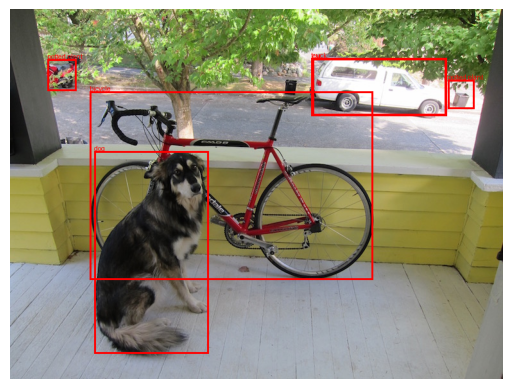

In [23]:
#object detection using facebook/detr-resnet-50

# Load the object detection pipeline
object_detector = pipeline("object-detection", model="facebook/detr-resnet-50")

# Perform object detection
results = object_detector("dog_bike_car.jpg")

# Print results
print(results)

# Load the image
image = Image.open("dog_bike_car.jpg")

# Draw the bounding boxes
draw = ImageDraw.Draw(image)
for result in results:
    box = result["box"]
    draw.rectangle([(box["xmin"], box["ymin"]), (box["xmax"], box["ymax"])], outline="red", width=3)
    draw.text((box["xmin"], box["ymin"] - 10), result["label"], fill="red")

# Display the image inline
plt.imshow(image)
plt.axis("off")  # Turn off axis
plt.show()


image 1/1 /content/dog_bike_car.jpg: 480x640 1 bicycle, 1 car, 1 truck, 1 dog, 319.2ms
Speed: 20.1ms preprocess, 319.2ms inference, 19.2ms postprocess per image at shape (1, 3, 480, 640)


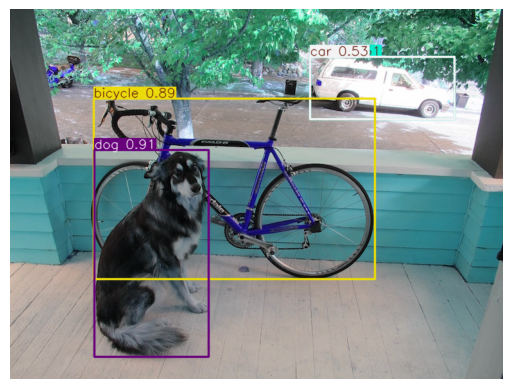

In [24]:
#object detection using YOLO
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image

# Load YOLO model
model = YOLO("yolov8n.pt")  # YOLOv8 nano model for object detection

# Perform object detection
results = model("dog_bike_car.jpg", show=False)  # Run inference, don't save output

# Load and display the annotated image
annotated_image = results[0].plot()  # Returns a NumPy array with the annotations
plt.imshow(annotated_image)
plt.axis("off")
plt.show()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


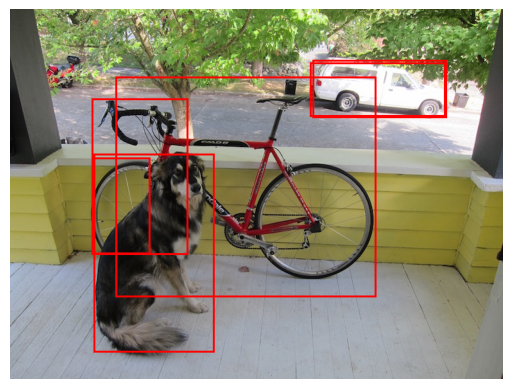

In [25]:
#object detection using R-CNN
# Load the pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load and preprocess the image
image_path = "dog_bike_car.jpg"
image = Image.open(image_path).convert("RGB")
transform = T.Compose([T.ToTensor()])
input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Perform object detection
with torch.no_grad():
    predictions = model(input_image)

# Draw bounding boxes
draw = ImageDraw.Draw(image)
for box, label, score in zip(predictions[0]["boxes"], predictions[0]["labels"], predictions[0]["scores"]):
    if score > 0.5:  # Confidence threshold
        draw.rectangle(box.tolist(), outline="red", width=3)

# Display the image
plt.imshow(image)
plt.axis("off")
plt.show()

In [26]:
#Image-to-Text using BLIP
from PIL import Image

# Load BLIP processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Load and preprocess the image
image = Image.open("carte.jpg").convert("RGB")
inputs = processor(images=image, return_tensors="pt")

# Generate caption
outputs = model.generate(**inputs)
caption = processor.decode(outputs[0], skip_special_tokens=True)
print("Description:", caption)


Description: a map of africa with the provinces highlighted in red - stock image


In [27]:
# Named Entity Recognition
# Check if CUDA (GPU) is available
device = 0 if torch.cuda.is_available() else -1

ner = pipeline("ner", grouped_entities=True, device=device)
result = ner("Barack Obama was the 44th president of the United States.")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
/usr/local

[{'entity_group': 'PER', 'score': 0.99918306, 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': 0.9986908, 'word': 'United States', 'start': 43, 'end': 56}]


In [28]:
# Question Answering with Context
# Check if CUDA (GPU) is available
device = 0 if torch.cuda.is_available() else -1
question_answerer = pipeline("question-answering", device=device)
result = question_answerer(question="Who was the 44th president of the United States?", context="Barack Obama was the 44th president of the United States.")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


{'score': 0.988945484161377, 'start': 0, 'end': 12, 'answer': 'Barack Obama'}


In [29]:
# Text Summarization
# Check if CUDA (GPU) is available
device = 0 if torch.cuda.is_available() else -1
summarizer = pipeline("summarization", device=device)
text = """The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing (NLP).
It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering, among others.
It's an extremely popular library that's widely used by the open-source data science community.
It lowers the barrier to entry into the field by providing Data Scientists with a productive, convenient way to work with transformer models.
"""
summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


 The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing . It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering .


In [30]:
# Translation
# Check if CUDA (GPU) is available
device = 0 if torch.cuda.is_available() else -1
translator = pipeline("translation_en_to_fr", device=device)
result = translator("The Data Scientists were truly amazed by the power and simplicity of the HuggingFace pipeline API.")
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Les Data Scientists ont été vraiment étonnés par la puissance et la simplicité de l'API du pipeline HuggingFace.


In [31]:
# Classification
# Check if CUDA (GPU) is available
device = 0 if torch.cuda.is_available() else -1
classifier = pipeline("zero-shot-classification", device=device)
result = classifier("Hugging Face's Transformers library is amazing!", candidate_labels=["technology", "sports", "politics"])
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


{'sequence': "Hugging Face's Transformers library is amazing!", 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9493840336799622, 0.03225008025765419, 0.01836594194173813]}


In [32]:
# Text Generation
# Check if CUDA (GPU) is available
device = 0 if torch.cuda.is_available() else -1
generator = pipeline("text-generation", device=device)
result = generator("If there's one thing I want you to remember about using HuggingFace pipelines, it's")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


If there's one thing I want you to remember about using HuggingFace pipelines, it's that you keep everything in sync with the project's workflow. If it was hard-coded into your GitHub project, you could move all your data to a


In [33]:
# Image Generation

# Dynamically select the device
device = "cuda" if torch.cuda.is_available() else "cpu"
# Load the model with the appropriate device
image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32,  # Use float32 for CPU
    use_safetensors=True,
    variant="fp16" if device == "cuda" else None  # Use fp16 only for GPU
).to(device)

# Generate the image
text = "A class of Data Scientists learning about AI, in the surreal style of Salvador Dali"
image = image_gen(prompt=text).images[0]

# Display the image
image.show()

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [34]:
# Audio Generation
# Check if CUDA (GPU) is available
device = 0 if torch.cuda.is_available() else -1
synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device=device)

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

speech = synthesiser("Hi to an artificial intelligence engineer, on the way to mastery!", forward_params={"speaker_embeddings": speaker_embedding})

sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])
Audio("speech.wav")

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

cmu-arctic-xvectors.py:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/21.3M [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/7931 [00:00<?, ? examples/s]

# All the available pipelines

Here are all the pipelines available from Transformers and Diffusers.

With thanks to student Lucky P for suggesting I include this!

There's a list pipelines under the Tasks on this page (you have to scroll down a bit, then expand the parameters to see the Tasks):

https://huggingface.co/docs/transformers/main_classes/pipelines

There's also this list of Tasks for Diffusion models instead of Transformers, following the image generation example where I use DiffusionPipeline above.

https://huggingface.co/docs/diffusers/en/api/pipelines/overview

If you come up with some cool examples of other pipelines, please share them with me! It's wonderful how HuggingFace makes this advanced AI functionality available for inference with such a simple API.

In [39]:
!pip install -q torch transformers torchvision huggingface_hub tqdm matplotlib Pillow
